In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Read in Our DataFrame
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Inspect the features
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
#Look for any missing values and the type of data you're working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.shape

(1470, 35)

In [6]:
#Determine which features are Continuous, Ordinal, and Catigorical
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
#Dropping some features that wont attribute to attrition
#We drop hourly and monthly rate since we are given monthly income
df.drop(['EmployeeCount','HourlyRate', 'MonthlyRate', 'Over18', 'StandardHours'], axis = 1, inplace = True)

In [8]:
#Convert attrition from string to binary types
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [9]:
#Have a closer and better look at all the object features
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ': ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('__'*35)

BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
______________________________________________________________________
Department: ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
______________________________________________________________________
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
______________________________________________________________________
Gender: ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
___________________________________________________________

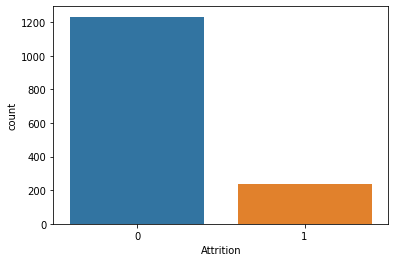

In [10]:
#Visualizing the attrition
attrition = df['Attrition'].value_counts().reset_index()
attrition.rename(columns = {'index':'Attrition', 'Attrition':'count'}, inplace = True)
plot = sns.barplot(data = attrition, x = attrition['Attrition'], y = attrition['count'])

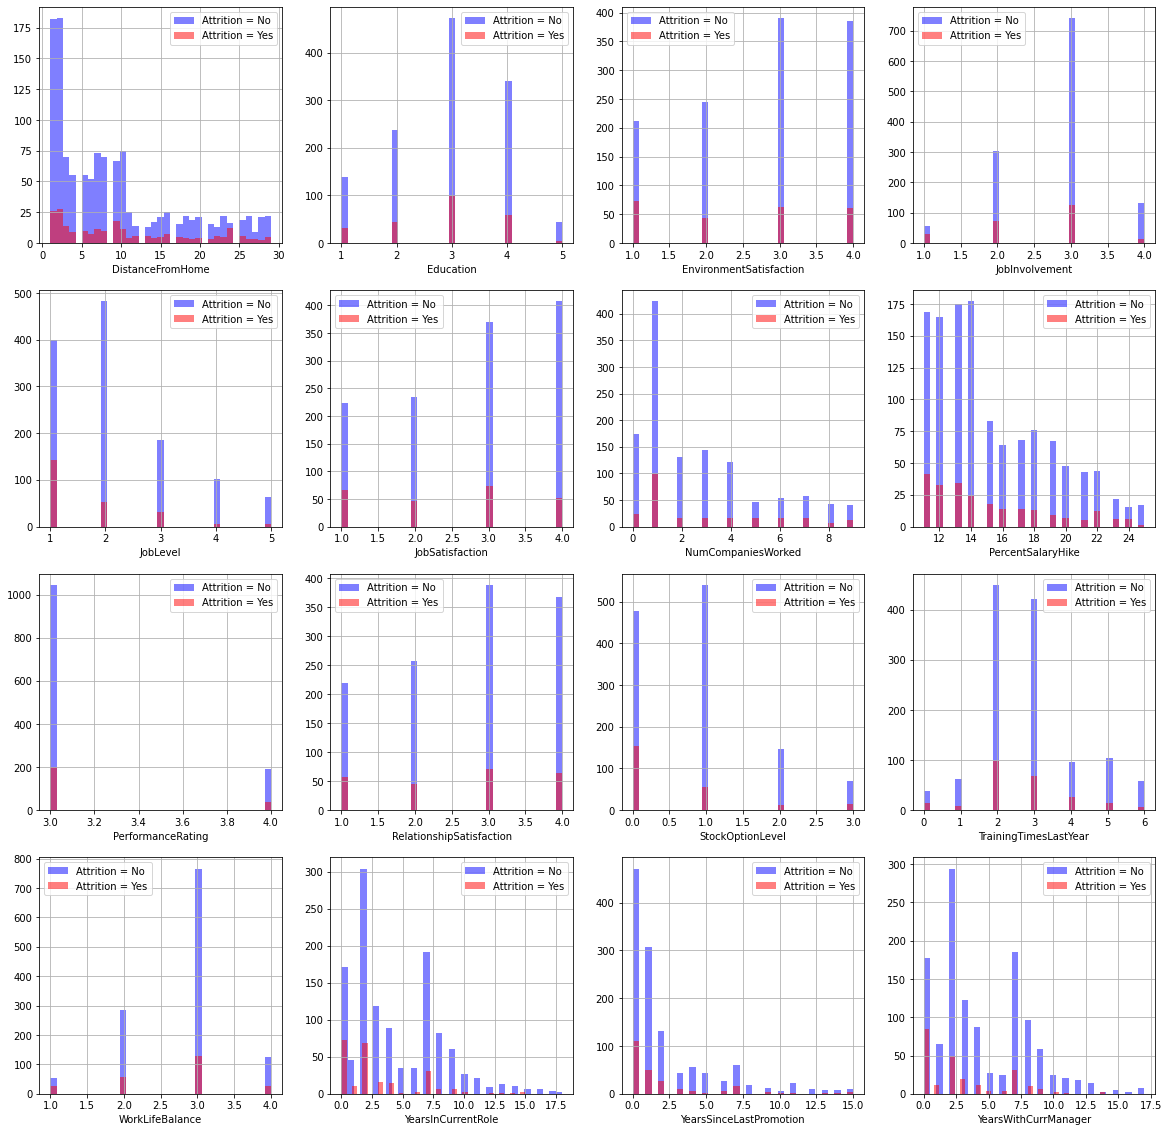

In [11]:
#Quick way to analyze attrition per discrete feature
column_1 = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        column_1.append(column)
column_1.remove('Attrition')

plt.figure(figsize = (20,20))

for i, col in enumerate(column_1, 1):
    plt.subplot(4,4,i)
    df[df['Attrition'] == 0 ][col].hist(bins = 35, color = 'blue', label = 'Attrition = No', alpha = 0.5)
    df[df['Attrition'] == 1 ][col].hist(bins = 35, color = 'red', label = 'Attrition = Yes', alpha = 0.5)
    plt.legend()
    plt.xlabel(col)

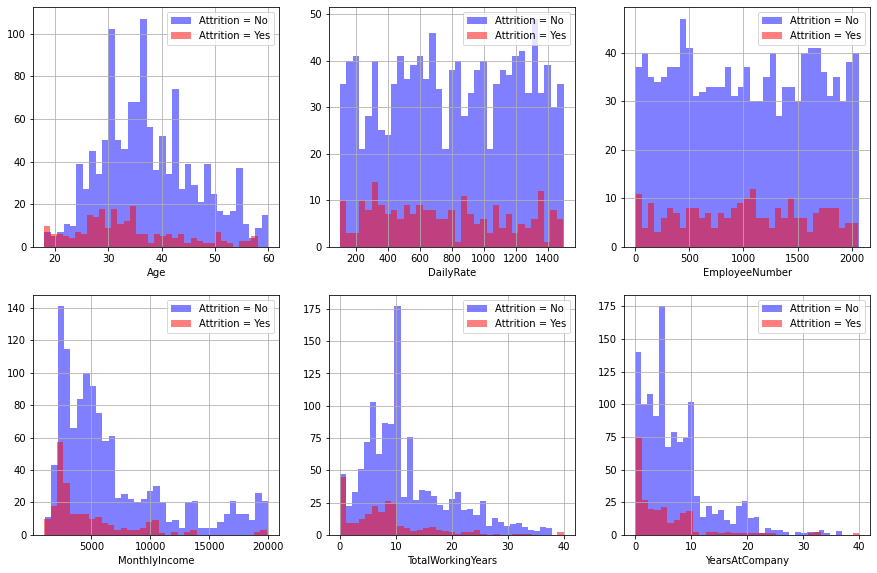

In [12]:
#Quick way to analyze attrition per continuous feature
column_2 = []
for column in df.columns:
    if df[column].dtype != object and df[column].nunique() > 30:
        column_2.append(column)

plt.figure(figsize = (15,15))

for i, col in enumerate(column_2, 1):
    plt.subplot(3,3,i)
    df[df['Attrition'] == 0 ][col].hist(bins = 35, color = 'blue', label = 'Attrition = No', alpha = 0.5)
    df[df['Attrition'] == 1 ][col].hist(bins = 35, color = 'red', label = 'Attrition = Yes', alpha = 0.5)
    plt.legend()
    plt.xlabel(col)

<AxesSubplot:xlabel='Age', ylabel='count'>

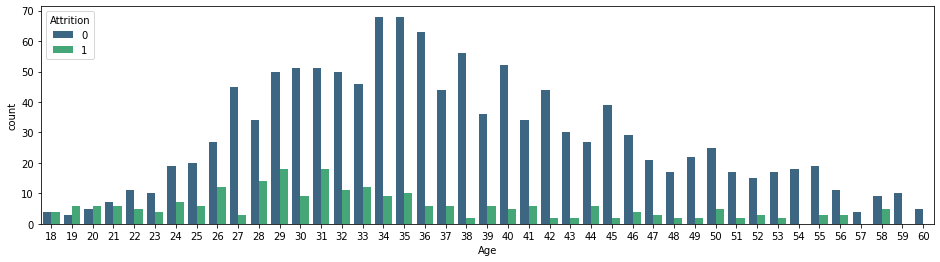

In [13]:
#We can see that people between the ages of 18-31 have a higher attrition rate
#Probably because people around this age are more likely to find other jobs were they can negotiate a better deal
plt.subplots(figsize=(16,4))
sns.countplot(x = 'Age', hue = 'Attrition', data = df, palette = 'viridis')

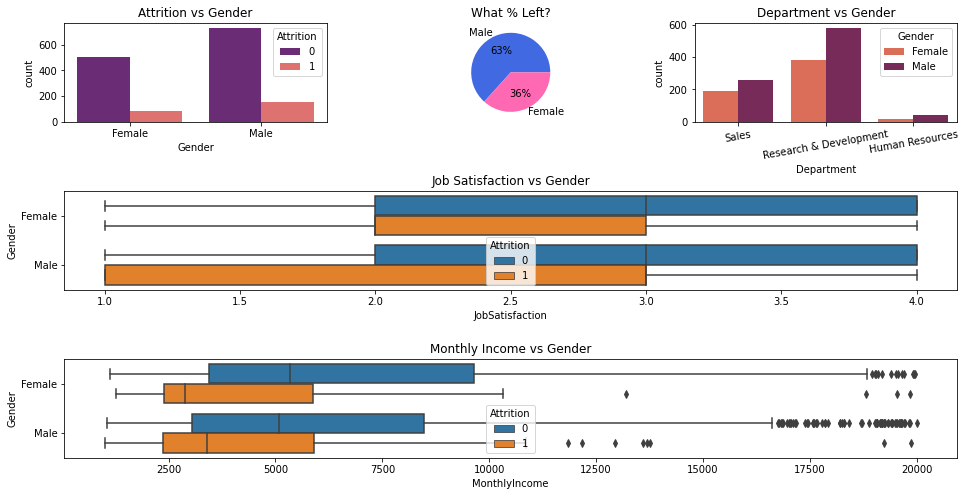

In [14]:
#Determine Attrition based on gender
#Males are more likely to leave than females
#Men who left had a lower satisfaction than women who left
plt.figure(figsize = (16,8))
plt.subplots_adjust(hspace = 0.7)

plt.subplot(3,3,1)
sns.countplot(x = 'Gender', hue = 'Attrition', data = df, palette = 'magma')
plt.title('Attrition vs Gender')

plt.subplot(3,3,2)
attrition = df[df['Attrition'] == 1]
plt.pie(attrition[['Attrition', 'Gender']].value_counts().reset_index()[0], autopct = '%0.d%%', 
        labels = ['Male', 'Female'], colors = ['RoyalBlue', 'HotPink'])
plt.title('What % Left?')

plt.subplot(3,1,2)
sns.boxplot(y = 'Gender', x = 'JobSatisfaction', hue = 'Attrition', data = df)
plt.title('Job Satisfaction vs Gender')

plt.subplot(3,1,3)
sns.boxplot(y = 'Gender', x = 'MonthlyIncome', hue = 'Attrition', data = df)
plt.title('Monthly Income vs Gender')

plt.subplot(3,3,3)
plot = sns.countplot(x = 'Department', hue = 'Gender', data = df, palette = 'rocket_r')
plot.set_xticklabels(labels = df['Department'].unique(), rotation = 10)
plt.title('Department vs Gender')

plt.show()

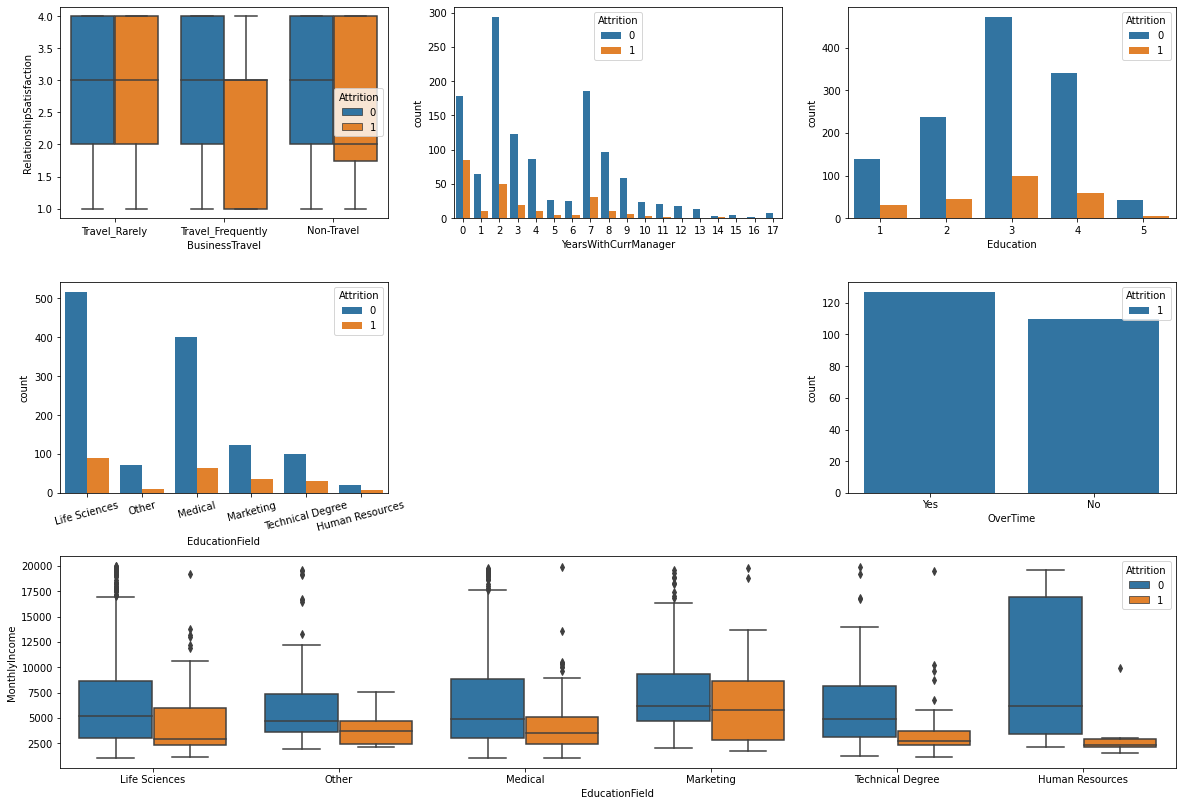

In [16]:
df2 = df[df['Attrition'] == 1]

plt.figure(figsize = (20,14))
plt.subplots_adjust(hspace = 0.3)

plt.subplot(3,3,1)
sns.boxplot(x = 'BusinessTravel', y = 'RelationshipSatisfaction', hue = 'Attrition', data = df)

plt.subplot(3,3,2)
sns.countplot(x = 'YearsWithCurrManager', hue = 'Attrition', data = df)

plt.subplot(3,3,3)
sns.countplot(x = 'Education', hue = 'Attrition', data = df)

plt.subplot(3,3,4)
plot = sns.countplot(x = 'EducationField', hue = 'Attrition', data = df)
plot.set_xticklabels(df['EducationField'].unique(), rotation = 15)

plt.subplot(3,3,6)
sns.countplot(x = 'OverTime', hue = 'Attrition', data = df2)

plt.subplot(3,1,3)
sns.boxplot(x = 'EducationField', y = 'MonthlyIncome', hue = 'Attrition', data = df)

plt.show()

In [15]:
pd.set_option('display.max_columns', None)
def edu_income(edu_level, income):
    return df[(df['Education'] == edu_level) & (df['MonthlyIncome'] >= income)]

In [16]:
edu_income(1, 15000)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
186,40,0,Travel_Rarely,989,Research & Development,4,1,Medical,253,4,Female,3,5,Manager,3,Married,19033,1,No,14,3,2,1,21,2,3,20,8,9,9
279,50,0,Travel_Rarely,797,Research & Development,4,1,Life Sciences,385,1,Male,3,5,Research Director,2,Divorced,19144,3,No,14,3,1,2,28,4,2,10,4,1,6
314,39,0,Travel_Rarely,117,Research & Development,10,1,Medical,429,3,Male,3,4,Manager,1,Married,17068,1,Yes,14,3,4,0,21,3,3,21,9,11,10
400,39,0,Travel_Frequently,1218,Research & Development,1,1,Life Sciences,531,2,Male,3,5,Manager,3,Divorced,19197,1,Yes,14,3,3,1,21,3,3,21,8,1,6
746,41,0,Non-Travel,247,Research & Development,7,1,Life Sciences,1035,2,Female,1,5,Research Director,3,Divorced,19973,1,No,22,4,2,2,21,3,3,21,16,5,10
749,52,1,Travel_Rarely,266,Sales,2,1,Marketing,1038,1,Female,1,5,Manager,4,Married,19845,1,No,15,3,4,1,33,3,3,32,14,6,9
774,55,0,Non-Travel,444,Research & Development,2,1,Medical,1074,3,Male,2,4,Manager,1,Single,16756,7,No,15,3,2,0,31,3,4,9,7,6,2
810,46,0,Travel_Rarely,406,Sales,3,1,Marketing,1124,1,Male,3,4,Manager,3,Married,17465,3,No,12,3,4,1,23,3,3,12,9,4,9
954,42,0,Non-Travel,495,Research & Development,2,1,Life Sciences,1334,3,Male,3,4,Manager,3,Married,17861,0,Yes,13,3,4,0,21,3,2,20,8,2,10
1377,49,0,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1941,2,Male,3,5,Research Director,4,Married,19161,3,No,15,3,4,0,28,3,3,5,4,4,3


In [17]:
edu_income(5, 15000)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
329,47,0,Travel_Rarely,1482,Research & Development,5,5,Life Sciences,447,4,Male,3,5,Research Director,3,Married,18300,4,No,11,3,2,1,21,2,3,3,2,1,1
348,42,0,Travel_Rarely,810,Research & Development,23,5,Life Sciences,468,1,Female,3,4,Research Director,4,Single,15992,2,No,14,3,2,0,16,2,3,1,0,0,0
445,55,0,Travel_Rarely,1117,Sales,18,5,Life Sciences,597,1,Female,3,4,Manager,2,Single,16835,3,No,23,4,4,0,37,2,3,10,9,7,7
455,33,0,Travel_Rarely,922,Research & Development,1,5,Medical,612,1,Female,4,4,Research Director,3,Divorced,16184,4,No,19,3,3,1,10,2,3,6,1,0,5
466,41,0,Travel_Rarely,1276,Sales,2,5,Life Sciences,625,2,Female,3,4,Manager,1,Married,16595,7,No,16,3,2,1,22,2,3,18,16,11,8
1014,31,0,Travel_Rarely,182,Research & Development,8,5,Life Sciences,1430,1,Female,3,4,Research Director,2,Single,16422,3,No,11,3,3,0,9,3,4,3,2,1,0
1116,55,0,Travel_Rarely,685,Sales,26,5,Marketing,1578,3,Male,2,5,Manager,4,Married,19586,1,No,21,4,3,1,36,3,3,36,6,2,13
1166,48,0,Travel_Frequently,365,Research & Development,4,5,Medical,1644,3,Male,2,4,Manager,4,Married,15202,2,No,25,4,2,1,23,3,3,2,2,2,2
1184,54,0,Travel_Rarely,584,Research & Development,22,5,Medical,1665,2,Female,3,4,Manager,3,Married,17426,3,No,25,4,3,1,36,6,3,10,8,4,7


In [18]:
edu_income(4, 15000)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
18,53,0,Travel_Rarely,1219,Sales,2,4,Life Sciences,23,1,Female,2,4,Manager,4,Married,15427,2,No,16,3,3,0,31,3,3,25,8,3,7
29,46,0,Travel_Rarely,705,Sales,2,4,Marketing,38,2,Female,3,5,Manager,1,Single,18947,3,No,12,3,4,0,22,2,2,2,2,2,1
105,59,0,Non-Travel,1420,Human Resources,2,4,Human Resources,140,3,Female,2,5,Manager,4,Married,18844,9,No,21,4,4,1,30,3,3,3,2,2,2
187,55,0,Travel_Rarely,692,Research & Development,14,4,Medical,254,3,Male,4,5,Research Director,2,Single,18722,8,No,11,3,4,0,36,3,3,24,15,2,15
190,52,0,Travel_Rarely,699,Research & Development,1,4,Life Sciences,259,3,Male,2,5,Manager,3,Married,19999,0,No,14,3,1,1,34,5,3,33,18,11,9
233,50,0,Travel_Rarely,854,Sales,1,4,Medical,323,4,Female,3,5,Manager,4,Divorced,19517,3,No,11,3,3,1,32,3,2,7,0,0,6
237,52,0,Non-Travel,771,Sales,2,4,Life Sciences,329,1,Male,2,5,Manager,3,Single,19068,1,Yes,18,3,4,0,33,2,4,33,7,15,12
280,53,0,Travel_Rarely,1070,Research & Development,3,4,Medical,386,3,Male,3,4,Research Director,3,Married,17584,3,Yes,16,3,4,3,21,5,2,5,3,1,3
290,49,0,Travel_Frequently,636,Research & Development,10,4,Life Sciences,396,3,Female,3,5,Research Director,1,Single,18665,9,Yes,11,3,4,0,22,4,3,3,2,1,2
300,41,0,Travel_Rarely,334,Sales,2,4,Life Sciences,410,4,Male,3,4,Manager,2,Single,16015,1,No,19,3,2,0,22,2,3,22,10,0,4


In [19]:
edu_income(3, 15000)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
25,53,0,Travel_Rarely,1282,Research & Development,5,3,Other,32,3,Female,3,5,Manager,3,Divorced,19094,4,No,11,3,4,1,26,3,2,14,13,4,8
45,41,1,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,58,2,Female,3,5,Research Director,3,Married,19545,1,No,12,3,4,0,23,0,3,22,15,15,8
106,50,0,Travel_Frequently,1115,Research & Development,1,3,Life Sciences,141,1,Female,3,5,Research Director,2,Married,18172,3,Yes,19,3,1,0,28,1,2,8,3,0,7
112,54,0,Non-Travel,142,Human Resources,26,3,Human Resources,148,4,Female,4,4,Manager,4,Single,17328,2,Yes,12,3,3,0,23,3,3,5,3,4,4
123,51,0,Travel_Rarely,684,Research & Development,6,3,Life Sciences,162,1,Male,3,5,Research Director,3,Single,19537,7,No,13,3,3,0,23,5,3,20,18,15,15
147,41,0,Travel_Frequently,857,Research & Development,10,3,Life Sciences,199,4,Male,2,4,Manager,1,Divorced,17181,4,No,13,3,2,1,21,2,2,7,6,7,7
165,50,0,Travel_Rarely,1452,Research & Development,11,3,Life Sciences,226,3,Female,3,5,Manager,2,Single,19926,3,No,15,3,2,0,21,5,3,5,4,4,4
235,43,0,Travel_Rarely,1034,Sales,16,3,Marketing,327,4,Female,3,4,Manager,4,Married,16064,5,Yes,22,4,3,1,22,3,3,17,13,1,9
244,45,0,Travel_Rarely,252,Research & Development,1,3,Other,336,3,Male,4,5,Manager,4,Married,19202,0,No,11,3,3,1,25,2,3,24,0,1,7
263,46,0,Travel_Rarely,488,Sales,2,3,Technical Degree,363,3,Female,1,4,Manager,2,Married,16872,3,Yes,12,3,2,1,28,2,2,7,7,7,7


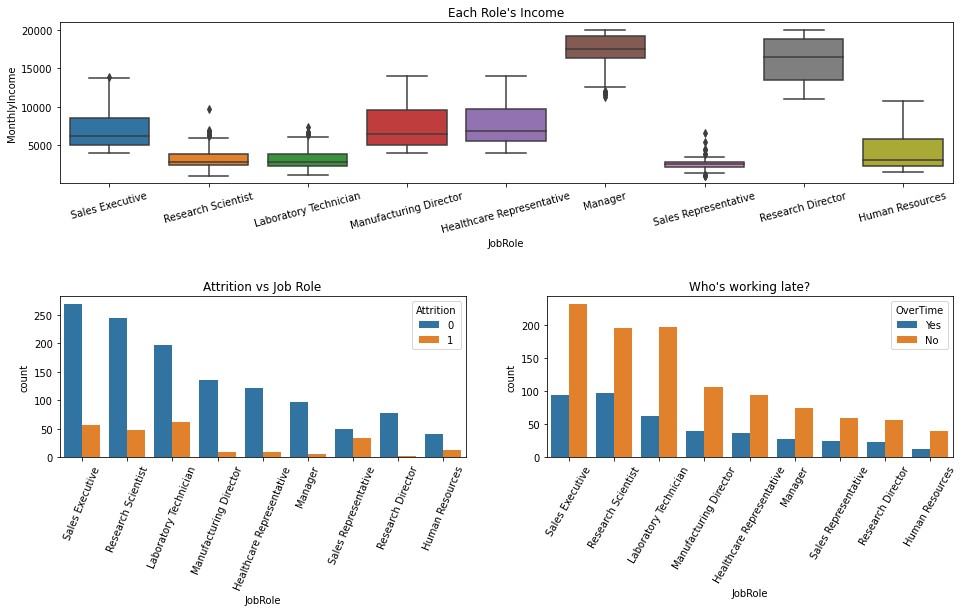

In [20]:
plt.subplots(figsize=(16,8))
plt.subplots_adjust(hspace = 0.7)

plt.subplot(2,1,1)
plot = sns.boxplot(x = 'JobRole', y = 'MonthlyIncome', data = df)
plot.set_xticklabels(labels = df['JobRole'].unique(), rotation = 15)
plt.title("Each Role's Income")

plt.subplot(2,2,3)
plot = sns.countplot(x = 'JobRole', hue = 'Attrition', data =df)
plot.set_xticklabels(labels = df['JobRole'].unique(), rotation = 67.5)
plt.title('Attrition vs Job Role')

plt.subplot(2,2,4)
plot = sns.countplot(x = 'JobRole', hue = 'OverTime', data = df)
plot.set_xticklabels(labels = df['JobRole'].unique(), rotation = 60)
plt.title("Who's working late?")

plt.show()

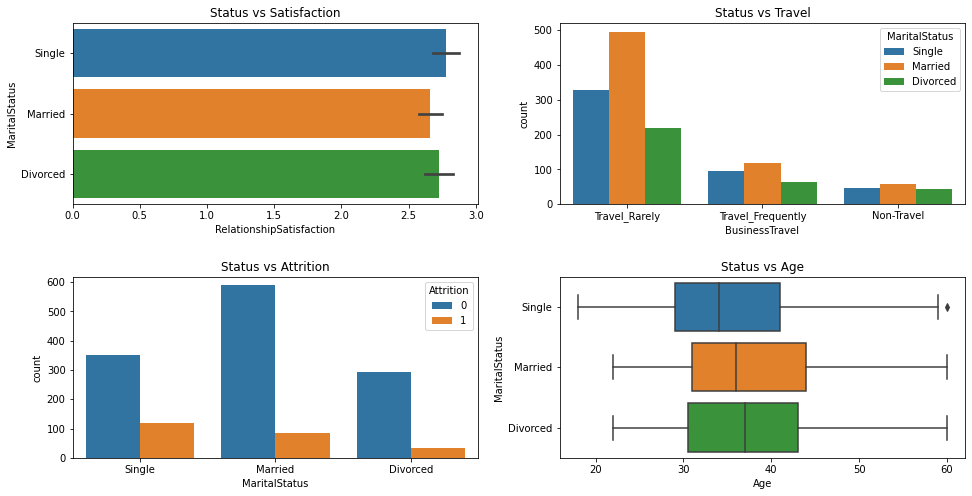

In [21]:
plt.figure(figsize = (16,8))
plt.subplots_adjust(hspace = 0.4)

plt.subplot(2,2,1)
sns.barplot(y = 'MaritalStatus', x = 'RelationshipSatisfaction', data = df)
plt.title('Status vs Satisfaction')

plt.subplot(2,2,2)
sns.countplot(x = 'BusinessTravel', hue = 'MaritalStatus', data = df)
plt.title('Status vs Travel')

plt.subplot(2,2,3)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df)
plt.title('Status vs Attrition')

plt.subplot(2,2,4)
sns.boxplot(y = 'MaritalStatus', x = 'Age', data = df)
plt.title('Status vs Age')

plt.show()